Welcome to your DataCamp project audition! This notebook must be filled out and vetted before a contract can be signed and you can start creating your project.

The first step is forking the repository in which this notebook lives. After that, there are two parts to be completed in this notebook:

- **Project information**:  The title of the project, a project description, etc.

- **Project introduction**: The three first text and code cells that will form the introduction of your project.

When complete, please email the link to your forked repo to projects@datacamp.com with the email subject line _DataCamp project audition_. If you have any questions, please reach out to projects@datacamp.com.

# Project information

**Project title**: What makes a Pokémon legendary?

**Name:** Joshua Feldman

**Email address associated with your DataCamp account:** joshuafeldman@hotmail.com

**Project description**:

Not all Pokémon are created equal. Some – like Caterpie or Magikarp – are consigned to mediocrity, useless in battle until they reach their more evolved states. Others – like Zapdos, Articuno and Moltres – are so unique and powerful that they have officially been classified as legendary.

But what exactly makes a Pokémon the stuff of legend? In this project, we will answer that question with the help of a dataset (or Pokédex!) that includes the base stats, height, weight and type of 801 Pokémon from all seven generations. Using the random forest algorithm, we will predict Pokemon status based on these characteristics and rank their importance in determining whether a Pokemon is classified as legendary.

Students should be familiar with the `tidyverse` suite of packages, particularly `ggplot2` for data visualization and `dplyr` for data manipulation. It would also be helpful to have some experience with classification problems, as taught through DataCamp courses such as [Supervised Learning in R: Classification](https://www.datacamp.com/courses/supervised-learning-in-r-classification).

# Project introduction

***Note: nothing needs to be filled out in this cell. It is simply setting up the template cells below.***

The final output of a DataCamp project looks like a blog post: pairs of text and code cells that tell a story about data. The text is written from the perspective of the data analyst and *not* from the perspective of an instructor on DataCamp. So, for this blog post intro, all you need to do is pretend like you're writing a blog post -- forget the part about instructors and students.

Below you'll see the structure of a DataCamp project: a series of "tasks" where each task consists of a title, a **single** text cell, and a **single** code cell. There are 8-12 tasks in a project and each task can have up to 10 lines of code. What you need to do:
1. Read through the template structure.
2. As best you can, divide your project as it is currently visualized in your mind into tasks.
3. Fill out the template structure for the first three tasks of your project.

As you are completing each task, you may wish to consult the project notebook format in our [documentation](https://instructor-support.datacamp.com/projects/datacamp-projects-jupyter-notebook). Only the `@context` and `@solution` cells are relevant to this audition.

## 1. Introduction

Our journey begins at a research lab in Pallet Town, Kanto. The first step is to open up the Pokédex, an encyclopaedic guide to 801 Pokémon from all seven generations.

![Legendary Pokémon](img/legendary_pokemon.jpg)

In [1]:
# Load the dataset
pokedex <- read.csv("datasets/pokedex.csv")

# Look at the first six rows
head(pokedex)

# Examine the structure
str(pokedex)

pokedex_number,name,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
1,Bulbasaur,49,5120,70,318,45,49,1059860,0.7,45,88.1,65,65,45,grass,poison,6.9,1,0
2,Ivysaur,62,5120,70,405,45,63,1059860,1.0,60,88.1,80,80,60,grass,poison,13.0,1,0
3,Venusaur,100,5120,70,625,45,123,1059860,2.0,80,88.1,122,120,80,grass,poison,100.0,1,0
4,Charmander,52,5120,70,309,45,43,1059860,0.6,39,88.1,60,50,65,fire,,8.5,1,0
5,Charmeleon,64,5120,70,405,45,58,1059860,1.1,58,88.1,80,65,80,fire,,19.0,1,0
6,Charizard,104,5120,70,634,45,78,1059860,1.7,78,88.1,159,115,100,fire,flying,90.5,1,0


'data.frame':	801 obs. of  20 variables:
 $ pokedex_number   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ name             : Factor w/ 801 levels "Abomasnow","Abra",..: 73 321 745 95 96 93 656 764 56 88 ...
 $ attack           : int  49 62 100 52 64 104 48 63 103 30 ...
 $ base_egg_steps   : int  5120 5120 5120 5120 5120 5120 5120 5120 5120 3840 ...
 $ base_happiness   : int  70 70 70 70 70 70 70 70 70 70 ...
 $ base_total       : int  318 405 625 309 405 634 314 405 630 195 ...
 $ capture_rate     : Factor w/ 34 levels "100","120","125",..: 26 26 26 26 26 26 26 26 26 21 ...
 $ defense          : int  49 63 123 43 58 78 65 80 120 35 ...
 $ experience_growth: int  1059860 1059860 1059860 1059860 1059860 1059860 1059860 1059860 1059860 1000000 ...
 $ height_m         : num  0.7 1 2 0.6 1.1 1.7 0.5 1 1.6 0.3 ...
 $ hp               : int  45 60 80 39 58 78 44 59 79 45 ...
 $ percentage_male  : num  88.1 88.1 88.1 88.1 88.1 88.1 88.1 88.1 88.1 50 ...
 $ sp_attack        : int  65 80 122 60 80 159 50

## 2. How many Pokémon are legendary?

After examining the Pokédex, we can see several variables that could feasibly explain what makes a Pokémon legendary. We have a series of numeric fighter stats – attack, defense, speed and so on – as well as a categorisation of Pokemon type (bug, dark, dragon, etc). `is_legendary` is the binary classification variable we will eventually be predicting, tagged `1` if a Pokémon is legendary and `0` if it is not.

Before we explore these variables in any depth, let's simply find out how many Pokémon are legendary out of the 801 total, using the handy `tally()` function from the `dplyr` package.

In [2]:
# Load the tidyverse suite of packages
library(tidyverse)

# Tally the number of legendary/non-legendary Pokémon
legendary_pokemon <- pokedex %>% 
  group_by(is_legendary) %>% 
  tally() %>% 
  mutate(prop = n / nrow(pokedex))

# Print the data frame
print(legendary_pokemon)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# A tibble: 2 x 3
  is_legendary     n   prop
         <int> <int>  <dbl>
1            0   731 0.913 
2            1    70 0.0874


## 3. Legendary Pokémon by height and weight

We now know that there are 70 legendary Pokémon – a sizable minority at 9% of the total population! Let's start to explore some of their distinguishing characteristics.

First of all, we'll plot the relationship between height and weight for all 801 Pokémon, highlighting those that are classified as legendary. We'll also add conditional labels to the plot, which will only print a Pokémon's name if it is above a certain height/weight.

Warning message:
“Removed 20 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 20 rows containing missing values (geom_point).”Warning message:
“Removed 20 rows containing missing values (geom_text).”

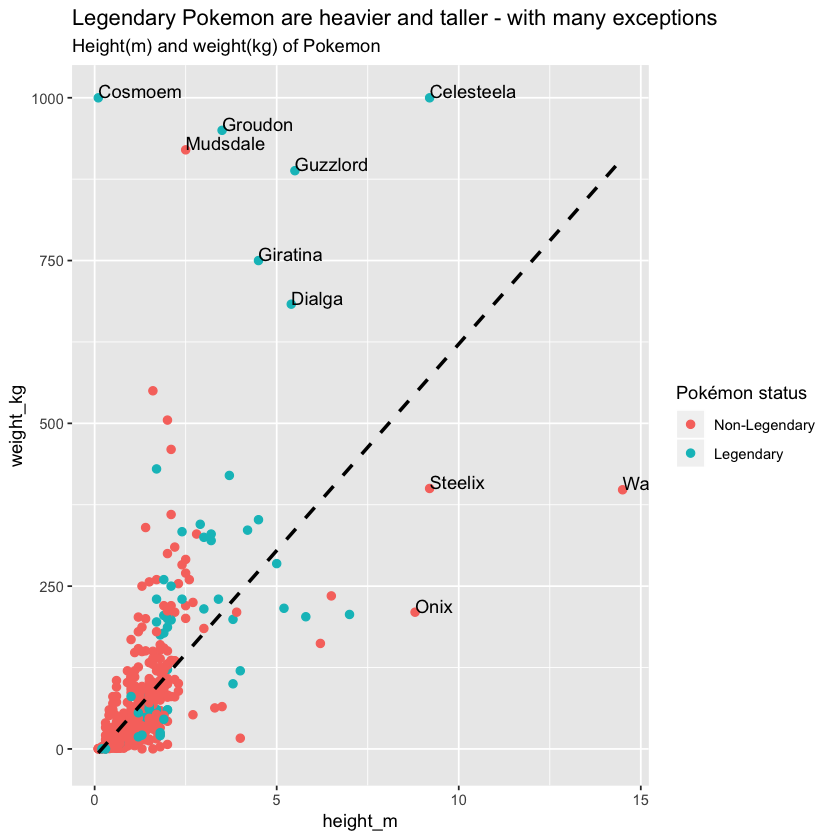

In [3]:
# Prepare the plot
legendary_by_heightweight <- pokedex %>% 
  ggplot(aes(height_m, weight_kg)) +
  geom_point(aes(color = as.factor(is_legendary)), size = 2) +
  geom_text(aes(label = ifelse(height_m > 7.5|weight_kg > 600, as.character(name), '')), hjust = 0, vjust = 0) +
  labs(title = "Legendary Pokemon are heavier and taller - with many exceptions",
       subtitle = "Height(m) and weight(kg) of Pokemon") +
  geom_smooth(method = "lm", se = FALSE, col = "black", linetype = "dashed") +
  guides(color = guide_legend(title = "Pokémon status")) +
  scale_color_manual(labels = c("Non-Legendary", "Legendary"),
                     values = c("#F8766D", "#00BFC4"))

# Print the plot
print(legendary_by_heightweight)

*Stop here! Only the three first tasks. :)*